<b>Import the necessary modules to analyse the data</b>

In [57]:
import pandas
from datetime import datetime
import matplotlib.pyplot as plt
import numpy

<b>Read in the data from a CSV file and modify the columns for easier data analysis.</b>
<p>This includes getting the date into integers for day, month and year</p>

In [58]:
def get_month(full_date):
    full_date_str = str(full_date)
    full_date_datetime = datetime.strptime(full_date_str, "%d-%b-%y")
    month_int = datetime.strftime(full_date_datetime, "%m")
    return month_int

sales_data = pandas.read_csv('Barnabys_sales_fabriacted_data.csv', usecols=['Customer', 'Date Required', 'Recipe', 'Quantity ordered'])
sales_data[['Day', 'Month', 'Year']] = sales_data['Date Required'].str.split('-', expand=True)
sales_data[['Month']]  = [get_month(date) for date in sales_data['Date Required']]
sales_data[['Year']] = [int(year) + 2000 for year in sales_data['Year']]


<b>This gives an initial overview of the data headings and quantity</b>

In [59]:
#this gives an overview of the data:
print('(orders, headings) =', sales_data.shape)
sales_data.head()

(orders, headings) = (662, 7)


,Customer,Date Required,Recipe,Quantity ordered,Day,Month,Year
0,Jaded Palates,02-Nov-18,Organic Red Helles,12,02,11,2018
1,Jaded Palates,02-Nov-18,Organic Red Helles,9,02,11,2018
2,Broadhempston Community Shop,09-Nov-18,Organic Red Helles,53,09,11,2018
3,Ben's Farm Shop - Staverton,14-Nov-18,Organic Red Helles,7,14,11,2018
4,The Kings Arms,14-Nov-18,Organic Red Helles,12,14,11,2018


In [60]:
sales_data.describe()

,Quantity ordered,Year
count,662.000000,662.000000
mean,33.537764,2018.864048
std,37.682497,0.342996
min,7.000000,2018.000000
25%,15.000000,2019.000000
50%,24.000000,2019.000000
75%,33.000000,2019.000000
max,529.000000,2019.000000


<h1>Data visualisation</h1>

Quantity per order frequency graph


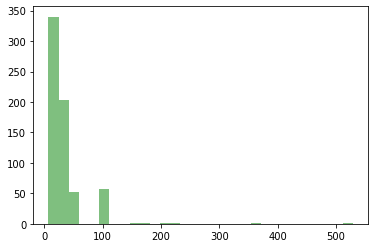

Distribution of sales of  ('Organic Red Helles', 'Organic Pilsner', 'Organic Dunkel')


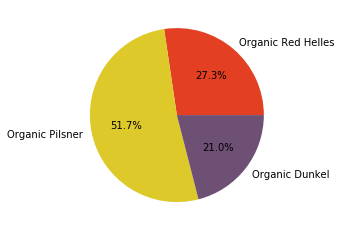

In [64]:
#this is to visualise the data set

#histogram
print('Quantity per order frequency graph')
order_quantities = [qty for qty in sales_data['Quantity ordered']]
num_bins = 30
n, bins, patches = plt.hist(order_quantities, num_bins, facecolor="green", alpha=0.5)
plt.show()

#pie chart
labels = tuple(sales_data['Recipe'].unique())
print('Distribution of sales of ', labels)
red_helles_count = len(sales_data[sales_data['Recipe'] == 'Organic Red Helles'])
pilsner_count = len(sales_data[sales_data['Recipe'] == 'Organic Pilsner'])
dunkel_count = len(sales_data[sales_data['Recipe'] == 'Organic Dunkel'])

sizes = [red_helles_count, pilsner_count, dunkel_count]
colours = ['#e33f22', '#dec92a', '#6e5075']

plt.pie(sizes, labels=labels, colors=colours, autopct='%1.1f%%')
plt.show()

<h1>Save edited data for further analysis</h1>

In [62]:
#saving the filtered/modified data

filtered_sales_data = sales_data.drop(['Customer', 'Date Required', 'Recipe', 'Quantity ordered'], axis=1)
outputfile = filtered_sales_data.to_csv('filtered_sales_data.csv', index=False)